In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# getting the data (the outcome is ordered, but I am fitting a multinomial model)
df = pd.read_stata('https://stats.idre.ucla.edu/stat/data/ologit.dta')

# "This hypothetical data set has a three level variable called apply, with levels “unlikely”, “somewhat likely”, 
# and “very likely”, coded 1, 2, and 3, respectively, that we will use as our outcome variable. We also have three 
# variables that we will use as predictors: pared, which is a 0/1 variable indicating whether at least one parent has 
# a graduate degree; public, which is a 0/1 variable where 1 indicates that the undergraduate institution is public 
# and 0 private, and gpa, which is the student’s grade point average. Let’s start with the descriptive statistics 
# of these variables." from https://stats.idre.ucla.edu/r/dae/ordinal-logistic-regression/

display(df.head(10))

# creating numerical codes for the outcome categories 
outcome_categories = df['apply'].unique()

codes = np.arange(len(outcome_categories))

outcome_codes = np.zeros(len(df)).astype('int')

for i in np.arange(len(df)):
    for cat in np.arange(len(outcome_categories)):
        if df['apply'].iloc[i] == outcome_categories[cat]:
            outcome_codes[i] = codes[cat].copy()
            
outcome = outcome_codes
predictors = df[df.columns[df.columns != 'apply']].copy()
predictors = sm.add_constant(predictors)

# creating a train/test split
train_prop = 0.8
train_x = predictors[:int(len(predictors)* train_prop)]
train_y = outcome_codes[:int(len(predictors)* train_prop)]
test_x = predictors[int(len(predictors)* train_prop):]
test_y = outcome_codes[int(len(predictors)* train_prop):]

# performing multinomial logistic regression on the training data
mod = sm.MNLogit(train_y,train_x).fit()
display(mod.summary())

# generating predictions for the test data
predictions = mod.predict(test_x)

# converting the predicted probabilities to the discrete outcome classes
pred_classes = np.array([])

for i in np.arange(len(predictions)):
    pred_classes = np.append(pred_classes, predictions.iloc[i].idxmax())

# calculating the percentage of predictions the model gets correct
percent_correct = np.count_nonzero(pred_classes == test_y)/len(test_y) * 100

print('\nMultinomial Logistic Regression made the correct classification ', percent_correct, ' % of the time on the test data.\n')

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53
5,unlikely,0,1,2.59
6,somewhat likely,0,0,2.56
7,somewhat likely,0,0,2.73
8,unlikely,0,0,3.00
9,somewhat likely,1,0,3.50


Optimization terminated successfully.
         Current function value: 0.884806
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:                        MNLogit   Df Residuals:                      312
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:                 0.04782
Time:                        11:16:26   Log-Likelihood:                -283.14
converged:                       True   LL-Null:                       -297.36
Covariance Type:            nonrobust   LLR p-value:                 7.770e-05
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453      1.725      1.881      0.060      -0.136       6.626
pared         -0.5913      0.454     -1.302      0.193      -1.481       0.299
public        -1.2459      0.517     -2.409      0.016      -2.260      -0.232
gpa           -0.5097      0.565     -0.902      0.367      -1.617       0.598
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9109      1.682      2.920      0.003       1.615       8.207
pared         -1.5375      0.466     -3.299      0.001      -2.451      -0.624
public        -0.5309      0.472     -1.125      0.260      -1.456       0.394
gpa           -0.9103      0.552     -1.651      0.099      -1.991       0.171
==============================================================================
"""


Multinomial Logistic Regression made the correct classification  58.75  % of the time on the test data.



Here are the predictions of the model for the whole dataset, compared to the actual outcomes:


,actual,predicted
0,very likely,unlikely
1,somewhat likely,somewhat likely
2,unlikely,very likely
3,somewhat likely,unlikely
4,somewhat likely,unlikely
5,unlikely,unlikely
6,somewhat likely,unlikely
7,somewhat likely,unlikely
8,unlikely,unlikely
9,somewhat likely,somewhat likely


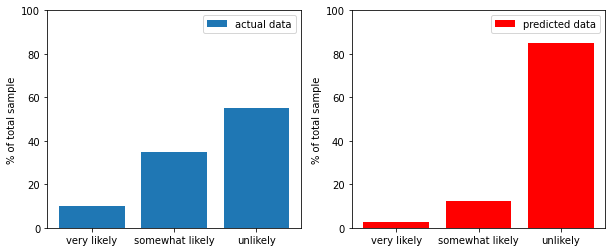


Multinomial Logistic Regression made the correct classification  57.75  % of the time on the full dataset.



In [2]:
pd.set_option('mode.chained_assignment', None)

# generating predictions for the whole dataset, and storing the predictions of the model in a dataframe
result_df  = pd.DataFrame()
result_df['actual'] = df['apply'].copy()
full_predictions = mod.predict(predictors)

full_pred_classes = np.array([])

for i in np.arange(len(full_predictions)):
    full_pred_classes = np.append(full_pred_classes, full_predictions.iloc[i].idxmax())
    
result_df['predicted'] = full_pred_classes

for i in np.arange(len(result_df)):
    for cat in np.arange(len(outcome_categories)):
        if result_df['predicted'].iloc[i] == codes[cat]:
            result_df['predicted'].iloc[i] = outcome_categories[cat]
print('Here are the predictions of the model for the whole dataset, compared to the actual outcomes:')            
display(result_df.head(10))

# creating a plot of the relative proportions of the outcome categories for the actual and predicted data

actual_props = np.array([])
predicted_props = np.array([])

for i in outcome_categories:
  actual_props = np.append(actual_props, np.count_nonzero(result_df['actual']==i)/len(result_df))
  predicted_props = np.append(predicted_props,  np.count_nonzero(result_df['predicted']==i)/len(result_df))
  
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.bar(outcome_categories, actual_props*100, label = 'actual data')
plt.ylim(0,100)
plt.ylabel('% of total sample')
plt.legend()
plt.subplot(1,2,2)
plt.bar(outcome_categories , predicted_props*100, label = 'predicted data', color = 'red' )
plt.ylim(0,100)
plt.ylabel('% of total sample')
plt.legend()
plt.show()

# calculating the percentage of correct predictions for the whole dataset
percent_correct_all = np.count_nonzero(result_df['predicted'] == result_df['actual'] )/len(result_df) * 100
print('\nMultinomial Logistic Regression made the correct classification ', percent_correct_all, ' % of the time on the full dataset.\n')

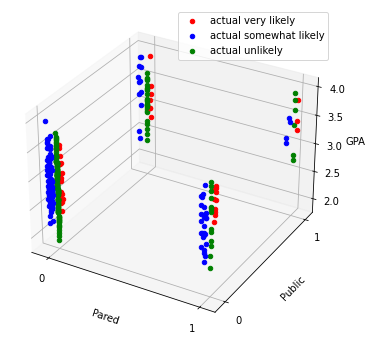

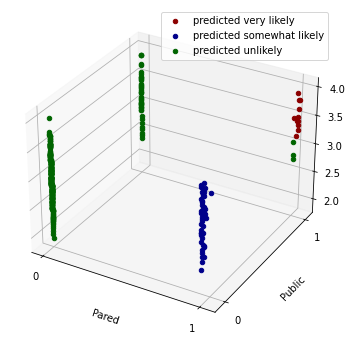

In [3]:

df['predicted'] = result_df['predicted'].copy()

actual_v_likely = df[df['apply'] == 'very likely'].copy()

actual_some_likely = df[df['apply'] == 'somewhat likely'].copy()

actual_unlikely = df[df['apply'] == 'unlikely'].copy()

pred_v_likely = df[df['predicted'] == 'very likely'].copy()

pred_some_likely = df[df['predicted'] == 'somewhat likely'].copy()

pred_unlikely = df[df['predicted'] == 'unlikely'].copy()

# creating two 3D scatterplots showing the actual and predicted outcome classes as a function of the three predictors

# creating the first plot
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

# plotting the actual data points (with some jitter)
for i in np.arange(len(actual_v_likely)):
    jitter = np.random.uniform(0.01, 0.02)
    ax.scatter(actual_v_likely['pared'].iloc[i]+jitter,
          actual_v_likely['public'].iloc[i]+jitter,actual_v_likely['gpa'].iloc[i], color = 'red')

ax.scatter(actual_v_likely['pared'].iloc[i],
          actual_v_likely['public'].iloc[i],actual_v_likely['gpa'].iloc[i],  label = 'actual very likely', color = 'red')

for i in np.arange(len(actual_some_likely)):
    jitter = np.random.uniform(-0.04, -0.02)
    ax.scatter(actual_some_likely['pared'].iloc[i]+jitter,
          actual_some_likely['public'].iloc[i]+jitter,actual_some_likely['gpa'].iloc[i], color = 'blue')

ax.scatter(actual_some_likely['pared'].iloc[i],
          actual_some_likely['public'].iloc[i],actual_some_likely['gpa'].iloc[i],  label = 'actual somewhat likely', color = 'blue')

for i in np.arange(len(actual_unlikely)):
    ax.scatter(actual_unlikely['pared'].iloc[i],
          actual_unlikely['public'].iloc[i],actual_unlikely['gpa'].iloc[i], color = 'green')

ax.scatter(actual_unlikely['pared'].iloc[i],
          actual_unlikely['public'].iloc[i],actual_unlikely['gpa'].iloc[i],  label = 'actual unlikely', color = 'green')
   
# labelling the axes, creating a legend    
plt.xlabel('Pared')
plt.ylabel('Public')
plt.xticks([0,1])
plt.yticks([0,1])
ax.set_zlabel('GPA')
plt.legend()
plt.show()

# creating the second plot
fig = plt.figure(figsize = (10,6))
ax2 = fig.add_subplot(111, projection='3d')

# plotting the predicted data points (with some jitter)
for i in np.arange(len(pred_v_likely)):
    jitter = np.random.uniform(0.01, 0.02)
    ax2.scatter(pred_v_likely['pared'].iloc[i]+jitter,
              pred_v_likely['public'].iloc[i]+jitter,pred_v_likely['gpa'].iloc[i], color = 'darkred')

ax2.scatter(pred_v_likely['pared'].iloc[i],
              pred_v_likely['public'].iloc[i],pred_v_likely['gpa'].iloc[i],  label = 'predicted very likely', color = 'darkred')

for i in np.arange(len(pred_some_likely)):
    jitter = np.random.uniform(-0.04, -0.02)
    ax2.scatter(pred_some_likely['pared'].iloc[i]+jitter,
          pred_some_likely['public'].iloc[i]+jitter,pred_some_likely['gpa'].iloc[i], color = 'darkblue')

ax2.scatter(pred_some_likely['pared'].iloc[i],
          pred_some_likely['public'].iloc[i],pred_some_likely['gpa'].iloc[i],  label = 'predicted somewhat likely', 
           color = 'darkblue')

for i in np.arange(len(pred_unlikely)):
    ax2.scatter(pred_unlikely['pared'].iloc[i],
          pred_unlikely['public'].iloc[i],pred_unlikely['gpa'].iloc[i], color = 'darkgreen')

ax2.scatter(pred_unlikely['pared'].iloc[i],
          pred_unlikely['public'].iloc[i],pred_unlikely['gpa'].iloc[i],  label = 'predicted unlikely', color = 'darkgreen')

       
# labelling the axes, creating a legend    
plt.xlabel('Pared')
plt.ylabel('Public')
plt.xticks([0,1])
plt.yticks([0,1])
ax.set_zlabel('GPA')
plt.legend()
plt.show()